In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw
from skimage.measure import label, regionprops, regionprops_table
from tqdm.notebook import tqdm

In [2]:
rename_dict = {v:k for k, v in {"area": "area(mm2)", 
                                      "convex_area": "convex_area(mm2)", 
                                      "equivalent_diameter": "equivalent_diameter(mm)", 
                                      "major_axis_length": "major_axis_length(mm)",
                                      "minor_axis_length": "minor_axis_length(mm)", 
                                      "perimeter": "perimeter(mm)"}.items()}
rename_dict

{'area(mm2)': 'area',
 'convex_area(mm2)': 'convex_area',
 'equivalent_diameter(mm)': 'equivalent_diameter',
 'major_axis_length(mm)': 'major_axis_length',
 'minor_axis_length(mm)': 'minor_axis_length',
 'perimeter(mm)': 'perimeter'}

In [8]:
merged_pd = pd.read_excel("../03_data_ana/out/2021_measured_fix.xlsx")
merged_pd = merged_pd.rename(columns=rename_dict)
merged_pd

,date,field,label,pos,area,convex_area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,circularity
0,20210512,24-2,285,West,2371,2529,0.485232,54.944071,59.213990,51.775862,197.438600,0.764324
1,20210514,24-2,285,West,4424,4565,0.438728,75.052060,79.395531,71.346405,260.350288,0.820179
2,20210515,24-2,285,West,5680,5766,0.314625,85.041170,87.950560,83.484087,291.521861,0.839877
3,20210519,24-2,285,West,12854,13470,0.500925,127.930532,139.130930,120.416505,460.315801,0.762318
4,20210520,24-2,285,West,14110,14488,0.489623,134.035107,144.629077,126.107069,460.658946,0.835560
...,...,...,...,...,...,...,...,...,...,...,...,...
17697,20210526,15-125,1660,West,4380,4698,0.611704,74.677903,84.545288,66.882632,284.971609,0.677768
17698,20210526,12-66,2015,East,4128,4778,0.895483,72.497813,117.143445,52.140058,314.699531,0.523790
17699,20210526,4-21,3082,East,9414,10683,0.893977,109.481857,170.052081,76.202503,446.931024,0.592247
17700,20210526,1-33,3513,East,4057,5397,0.942323,71.871641,137.165555,45.910162,340.693434,0.439225


In [9]:
merged_pd.iloc[6210:6212 :]

,date,field,label,pos,area,convex_area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,circularity
6210,20210514,19-105,1081,West,4676,4979,0.769036,77.160016,97.307367,62.199356,280.350288,0.747622
6211,20210515,19-105,1081,West,1,1,0.000000,1.128379,0.000000,0.000000,0.000000,inf


In [10]:
merged_pd.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_pd = merged_pd.dropna()
merged_pd

,date,field,label,pos,area,convex_area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,circularity
0,20210512,24-2,285,West,2371,2529,0.485232,54.944071,59.213990,51.775862,197.438600,0.764324
1,20210514,24-2,285,West,4424,4565,0.438728,75.052060,79.395531,71.346405,260.350288,0.820179
2,20210515,24-2,285,West,5680,5766,0.314625,85.041170,87.950560,83.484087,291.521861,0.839877
3,20210519,24-2,285,West,12854,13470,0.500925,127.930532,139.130930,120.416505,460.315801,0.762318
4,20210520,24-2,285,West,14110,14488,0.489623,134.035107,144.629077,126.107069,460.658946,0.835560
...,...,...,...,...,...,...,...,...,...,...,...,...
17697,20210526,15-125,1660,West,4380,4698,0.611704,74.677903,84.545288,66.882632,284.971609,0.677768
17698,20210526,12-66,2015,East,4128,4778,0.895483,72.497813,117.143445,52.140058,314.699531,0.523790
17699,20210526,4-21,3082,East,9414,10683,0.893977,109.481857,170.052081,76.202503,446.931024,0.592247
17700,20210526,1-33,3513,East,4057,5397,0.942323,71.871641,137.165555,45.910162,340.693434,0.439225


In [11]:
merged_pd.iloc[6210:6212 :]

,date,field,label,pos,area,convex_area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,circularity
6210,20210514,19-105,1081,West,4676,4979,0.769036,77.160016,97.307367,62.199356,280.350288,0.747622
6212,20210519,19-105,1081,West,10522,11951,0.852243,115.745525,167.248674,87.495614,452.416306,0.645999


In [12]:
non_destructive = pd.read_csv("out/non_destructive_manual.csv")
non_destructive

,date,pos,field,0,90,45,135
0,20210512,East,11-100,7.9,7.1,8.2,7.7
1,20210512,East,11-101,7.9,8.0,7.8,8.8
2,20210512,East,11-102,10.2,9.2,10.1,10.3
3,20210512,East,11-103,9.6,10.5,10.0,10.5
4,20210512,East,11-104,9.6,9.8,9.8,9.8
...,...,...,...,...,...,...,...
1999,20210526,West,19-95,9.4,13.7,10.7,10.5
2000,20210526,West,19-96,19.2,20.4,18.7,20.6
2001,20210526,West,19-97,19.0,20.0,19.6,18.9
2002,20210526,West,19-98,17.6,19.8,19.0,19.1


# draw polygon

![](https://img.sigmameow.com/picgo/jupyter_20210727195124.png)

In [16]:
for index, row in non_destructive.iterrows():
    a = np.asarray([0, row["0"] /2])
    b = np.asarray([row["45"]/2/np.sqrt(2), row["45"]/2/np.sqrt(2)])
    c = np.asarray([row["90"]/2, 0])
    d = np.asarray([row["135"]/2/np.sqrt(2), -row["135"]/2/np.sqrt(2)])
    e = -a
    f = -b
    g = -c
    h = -d
    poly = np.asarray([a,b,c,d,e,f,g,h,a])
    
    break

In [17]:
poly

array([[ 0.        ,  3.95      ],
       [ 2.8991378 ,  2.8991378 ],
       [ 3.55      ,  0.        ],
       [ 2.72236111, -2.72236111],
       [-0.        , -3.95      ],
       [-2.8991378 , -2.8991378 ],
       [-3.55      , -0.        ],
       [-2.72236111,  2.72236111],
       [ 0.        ,  3.95      ]])

In [13]:
def draw_binary_image(poly_list):
    poly_merge = np.vstack(poly_list)
    
    xmax, ymax = np.max(poly_merge, axis=0)
    xmin, ymin = np.min(poly_merge, axis=0)
    xlen = xmax - xmin
    ylen = ymax - ymin

    res = 0.1 # 1mm/ pix
    
    w = xlen / res
    h = ylen / res

    im = Image.new(mode='1', size=tuple(np.ceil([w, h]).astype(int)))
    draw = ImageDraw.Draw(im)
    
    for p in poly_list:
        points = (p - np.asarray([xmin, ymin])) / res
        draw.polygon(points.reshape(len(points)*2).tolist(), fill='white', outline='white')
        
    return np.asarray(im)

In [18]:
img = draw_binary_image([poly])

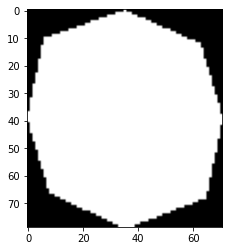

In [19]:
plt.imshow(img, cmap="gray")

In [20]:
props_all = pd.DataFrame(columns=["date", "field", "area", "convex_area", "eccentricity", "equivalent_diameter", "major_axis_length", "minor_axis_length", "perimeter", 'circularity'])

for index, row in tqdm(non_destructive.iterrows()):
    a = np.asarray([0, row["0"] /2])
    b = np.asarray([row["45"]/2/np.sqrt(2), row["45"]/2/np.sqrt(2)])
    c = np.asarray([row["90"]/2, 0])
    d = np.asarray([row["135"]/2/np.sqrt(2), -row["135"]/2/np.sqrt(2)])
    e = -a
    f = -b
    g = -c
    h = -d
    poly = np.asarray([a,b,c,d,e,f,g,h,a])
    
    binary_img = draw_binary_image([poly])
    
    label_img = label(binary_img)
    
    props = pd.DataFrame(regionprops_table(label_img, properties=['label', "area", "convex_area", "eccentricity", "equivalent_diameter", "major_axis_length", "minor_axis_length", "perimeter"]))
    props['circularity'] = 4 * props.area * np.pi / props.perimeter ** 2
    
    props['date'] = row["date"]
    props['field'] = row["field"]
    props = props[["date", "field", "area", "convex_area", "eccentricity", "equivalent_diameter", "major_axis_length", "minor_axis_length", "perimeter", 'circularity']]

    props_all.loc[len(props_all)] = props.iloc[0]

0it [00:00, ?it/s]

In [21]:
props_all

,date,field,area,convex_area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,circularity
0,20210512,11-100,4249,4335,0.427444,73.552667,77.509250,70.071597,253.823376,0.828769
1,20210512,11-101,4764,4849,0.428726,77.882689,82.069884,74.144788,268.308658,0.831596
2,20210512,11-102,7008,7124,0.377628,94.460906,98.350403,91.068269,327.764502,0.819748
3,20210512,11-103,7335,7446,0.418551,96.639599,101.543764,92.221345,334.735065,0.822636
4,20210512,11-104,6751,6865,0.250028,92.712675,94.329754,91.333715,320.735065,0.824679
...,...,...,...,...,...,...,...,...,...,...
1999,20210526,19-95,8718,8843,0.685573,105.357023,123.749386,90.090002,365.445743,0.820315
2000,20210526,19-96,27574,27817,0.401299,187.372109,196.015621,179.539956,652.097546,0.814863
2001,20210526,19-97,26690,26901,0.329611,184.344144,189.946481,179.331695,640.097546,0.818589
2002,20210526,19-98,25417,25646,0.423450,179.894218,189.252325,171.447361,624.499567,0.818974


# Draw figures

In [22]:
from matplotlib.collections import PolyCollection

In [23]:
pd.unique(props_all.date)

array([20210512, 20210515, 20210517, 20210519, 20210520, 20210524,
       20210526], dtype=object)

In [24]:
props_all.circularity.min(), props_all.circularity.max()

(0.8111677230908982, 0.906692501087524)

In [19]:
pd.unique(merged_pd.date)

array([20210512, 20210514, 20210515, 20210519, 20210520, 20210526],
      dtype=int64)

In [47]:
merged_pd.circularity.min(), merged_pd.circularity.max()

(0.1262194306281445, 0.901882229833296)

In [25]:
match_date = [20210512, 20210515, 20210519, 20210520, 20210526]

In [26]:
USMALL_SIZE = 12
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

cm = 1/2.54

plt.rc('font', size=SMALL_SIZE, family='Times New Roman')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

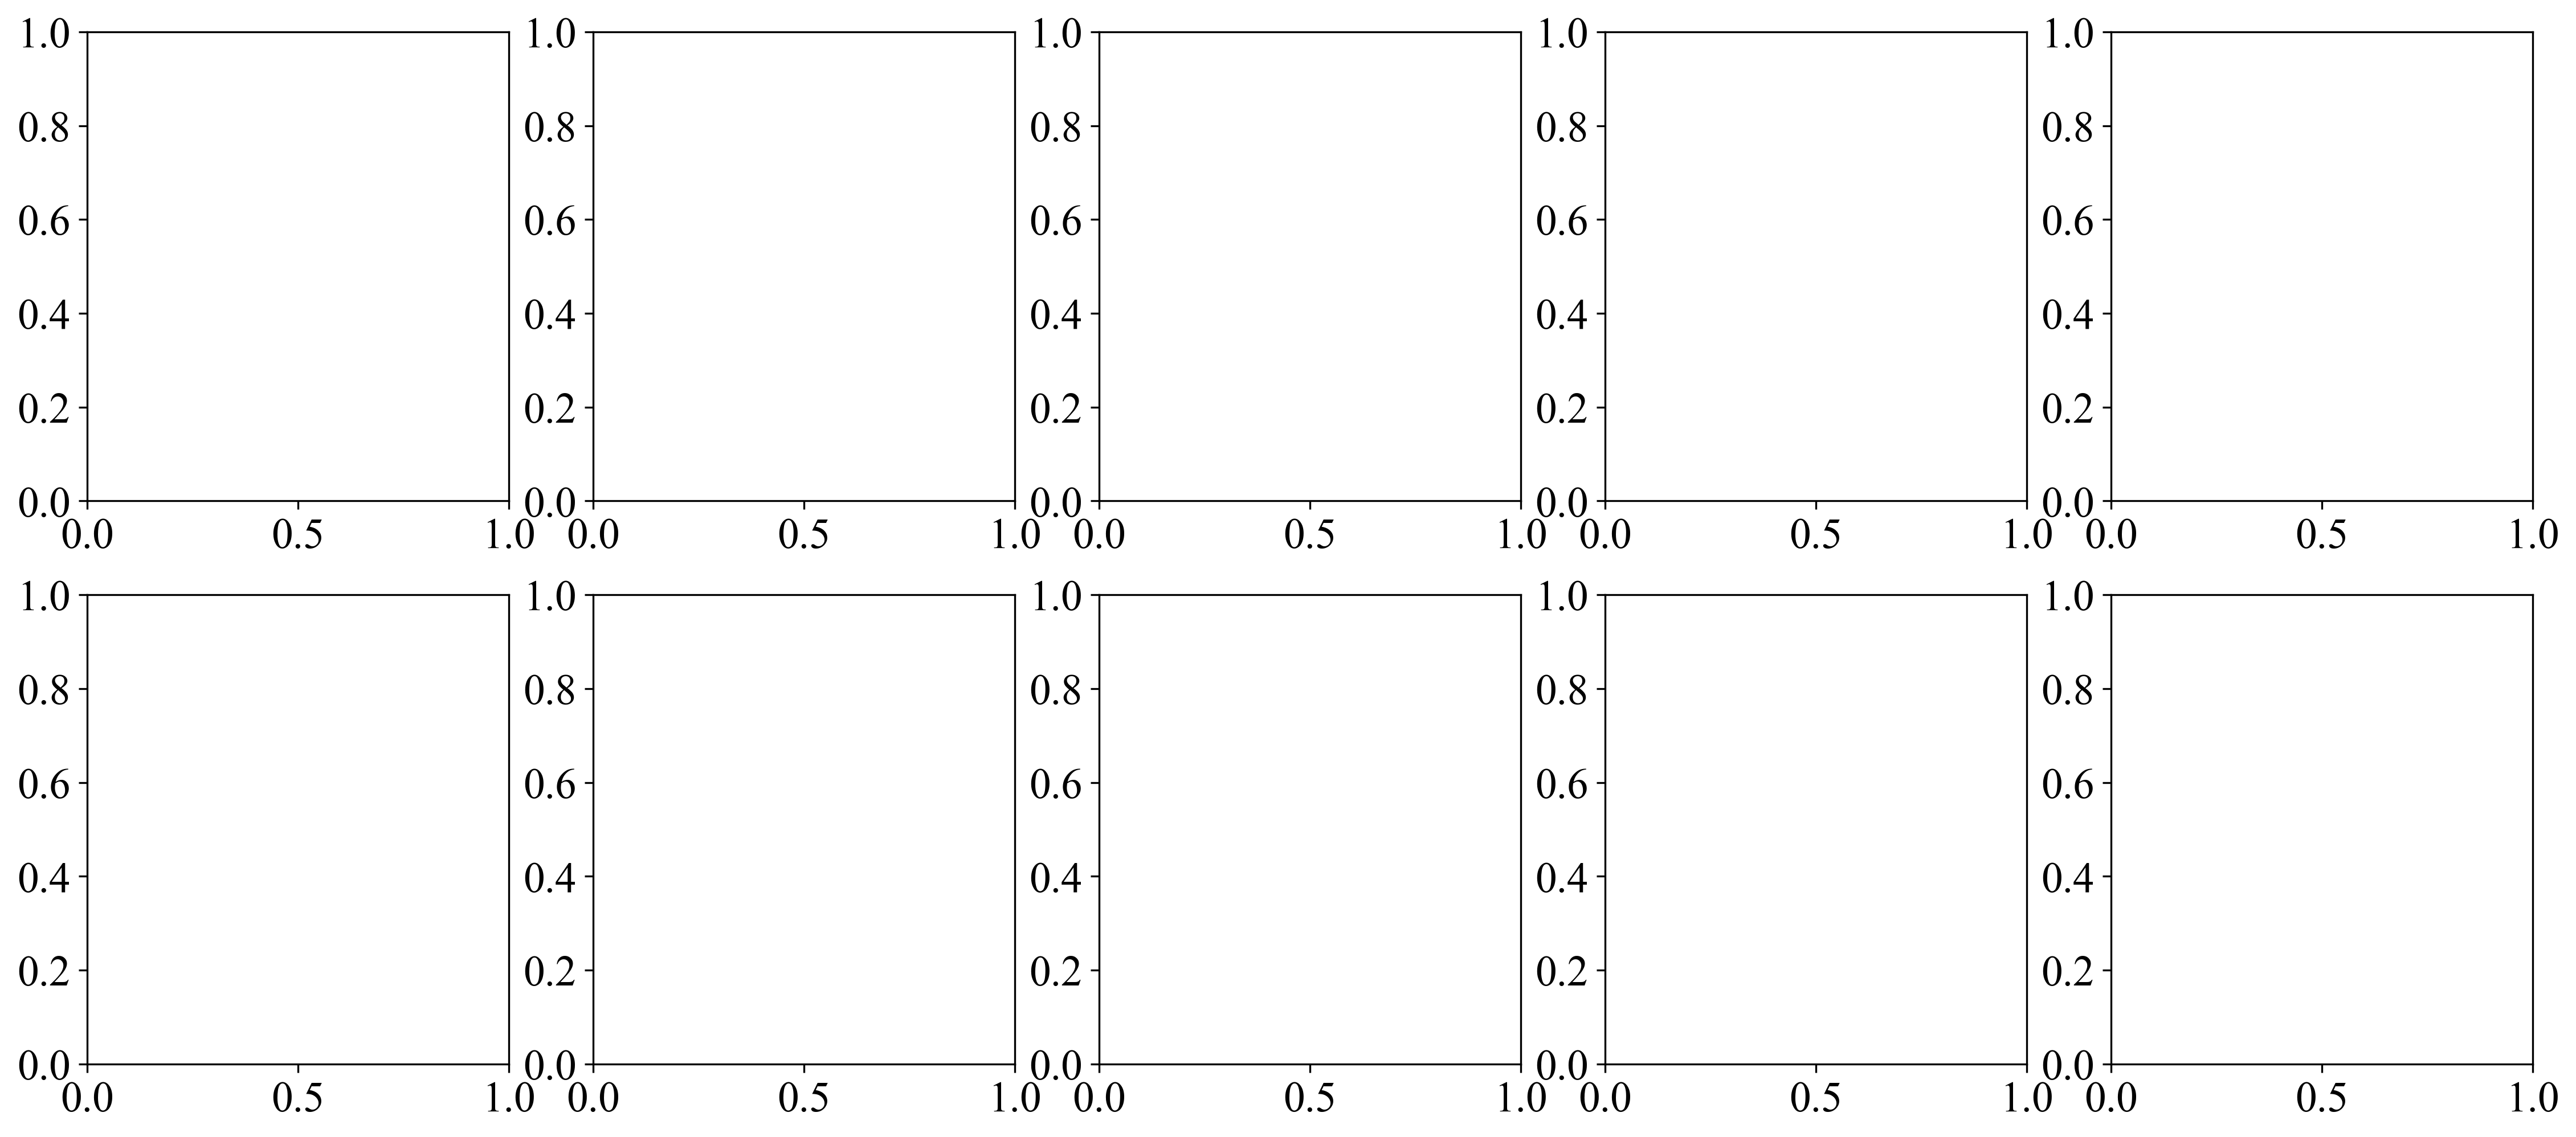

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18.46, 8), dpi=300)

for d in match_date:
    field = props_all[props_all.date == d]
    uav = merged_pd[merged_pd.date == d]
    
    
    
    # plot 1:1 table

    
    
    # plot violine table
    
    break

In [62]:
field

,date,field,area,convex_area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,circularity
0,20210512,11-100,4249,4335,0.427444,73.552667,77.509250,70.071597,253.823376,0.828769
1,20210512,11-101,4764,4849,0.428726,77.882689,82.069884,74.144788,268.308658,0.831596
2,20210512,11-102,7008,7124,0.377628,94.460906,98.350403,91.068269,327.764502,0.819748
3,20210512,11-103,7335,7446,0.418551,96.639599,101.543764,92.221345,334.735065,0.822636
4,20210512,11-104,6751,6865,0.250028,92.712675,94.329754,91.333715,320.735065,0.824679
...,...,...,...,...,...,...,...,...,...,...
196,20210512,8-52,5780,5871,0.392132,85.786506,89.613217,82.436005,295.705627,0.830651
197,20210512,8-6,6011,6111,0.318165,87.483958,89.960884,85.286107,301.563492,0.830614
198,20210512,8-7,5633,5736,0.268015,84.688596,86.387019,83.226523,293.421356,0.822179
199,20210512,8-8,4753,4844,0.397554,77.792722,81.411727,74.701666,268.166522,0.830555


In [63]:
uav

,date,field,label,pos,area,convex_area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,circularity
0,20210512,24-2,285,West,2371,2529,0.485232,54.944071,59.213990,51.775862,197.438600,0.764324
6,20210512,24-3,287,West,2133,2470,0.537675,52.113529,58.738901,49.525839,207.515765,0.622441
12,20210512,24-5,290,West,3064,3156,0.436804,62.459635,66.183537,59.535859,215.823376,0.826612
18,20210512,25-2,143,West,2201,2310,0.507040,52.937701,57.594992,49.642407,186.610173,0.794254
24,20210512,25-3,144,West,2473,2582,0.654588,56.113469,65.209004,49.297071,200.852814,0.770332
...,...,...,...,...,...,...,...,...,...,...,...,...
16765,20210512,2-142,3480,East,2773,2870,0.724103,59.419637,72.353176,49.901429,214.651804,0.756294
16771,20210512,3-138,3338,East,5156,5250,0.485269,81.023596,86.880141,75.964953,280.107648,0.825796
16777,20210512,3-139,3339,East,8425,8610,0.642202,103.571440,118.779957,91.049038,368.333044,0.780366
16783,20210512,3-140,3340,East,3739,3817,0.566743,68.997411,76.338104,62.894562,239.279221,0.820645


In [64]:
pd.merge(field, uav, on="field", suffixes=("_f","_u"))

,date_f,field,area_f,convex_area_f,eccentricity_f,equivalent_diameter_f,major_axis_length_f,minor_axis_length_f,perimeter_f,circularity_f,...,label,pos,area_u,convex_area_u,eccentricity_u,equivalent_diameter_u,major_axis_length_u,minor_axis_length_u,perimeter_u,circularity_u
0,20210512,11-100,4249,4335,0.427444,73.552667,77.509250,70.071597,253.823376,0.828769,...,2187,East,4353,4438,0.485963,74.447376,80.189023,70.083556,257.279221,0.826398
1,20210512,11-101,4764,4849,0.428726,77.882689,82.069884,74.144788,268.308658,0.831596,...,2188,East,5805,6067,0.324676,85.971830,88.742803,83.935192,303.421356,0.792355
2,20210512,11-103,7335,7446,0.418551,96.639599,101.543764,92.221345,334.735065,0.822636,...,2190,East,7398,7720,0.500484,97.053728,105.357537,91.212838,346.592929,0.773900
3,20210512,11-104,6751,6865,0.250028,92.712675,94.329754,91.333715,320.735065,0.824679,...,2191,East,7926,8280,0.571172,100.457437,111.437977,91.471670,355.948268,0.786122
4,20210512,11-105,3738,3814,0.142062,68.988183,69.417492,68.713443,237.137085,0.835315,...,2192,East,3984,4060,0.545589,71.222092,78.208738,65.543054,242.208153,0.853398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,20210512,8-52,5780,5871,0.392132,85.786506,89.613217,82.436005,295.705627,0.830651,...,2559,East,6745,6996,0.626092,92.671467,106.318475,82.901734,328.634560,0.784811
183,20210512,8-6,6011,6111,0.318165,87.483958,89.960884,85.286107,301.563492,0.830614,...,2514,East,7052,7308,0.303720,94.756980,97.432512,92.829921,331.563492,0.806100
184,20210512,8-7,5633,5736,0.268015,84.688596,86.387019,83.226523,293.421356,0.822179,...,2515,East,4502,4616,0.551924,75.710795,84.030698,70.072750,267.563492,0.790245
185,20210512,8-8,4753,4844,0.397554,77.792722,81.411727,74.701666,268.166522,0.830555,...,2516,East,5398,5472,0.480705,82.903239,89.466480,78.451565,284.391919,0.838703


In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

def lowess(x, y, frac=0.5):
    lowess = sm.nonparametric.lowess
    z = lowess(y, x, frac)
    x_points = []
    y_points = []
    for x_y in z:
        x_points.append(x_y[0])
        y_points.append(x_y[1])
    return x_points, y_points

def linear(x, y, printf=True):
    def func(x, a, b):
        y = a * x + b
        return y

    def fitans(xdata, ydata):
        popt, pcov = curve_fit(func, xdata, ydata)
        residuals = ydata - func(xdata, *popt)
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((ydata - np.mean(ydata)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        return popt, pcov, r_squared
    
    t, p, r2 = fitans(x, y)
    
    x_points = np.linspace(min(x), max(x), num=max(int(max(x)-min(x))+1, 100), endpoint=True)
    y_points = func(x_points, *t)
    y_predict = func(x, *t)
    if printf:
        print(f'y={round(t[0], 3)}x+{round(t[1], 3)}  R^2={round(r2, 2)}')
        print(f'RMSE = {rmse(y_predict, y)}')
        print('-----------------')
    return x_points, y_points, y_predict, t, r2

def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [28]:
import seaborn as sns

import matplotlib.patheffects as pe

In [29]:
palette = sns.color_palette("Spectral", n_colors=7)
palette.remove(palette[2])
palette.remove(palette[2])
palette

[(0.8662821991541715, 0.2901191849288735, 0.2978085351787774),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594),
 (0.8384467512495197, 0.9349480968858133, 0.6089965397923875),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349),
 (0.24006151480199925, 0.58239138792772, 0.7208765859284891)]

y=0.701x+10.172  R^2=0.66
RMSE = 8.561466145004427
-----------------
y=0.745x+11.601  R^2=0.72
RMSE = 7.0047575540951845
-----------------
y=0.527x+35.224  R^2=0.42
RMSE = 8.656317301079417
-----------------
y=0.733x+17.224  R^2=0.64
RMSE = 7.2677757715434685
-----------------
y=0.657x+23.477  R^2=0.6
RMSE = 16.95960395755385
-----------------
y=0.724x+19.435  R^2=0.73
RMSE = 9.617950095165284
-----------------
y=0.493x+49.462  R^2=0.42
RMSE = 12.637854748613554
-----------------
y=0.651x+32.482  R^2=0.59
RMSE = 11.140428999371553
-----------------
y=0.477x+68.569  R^2=0.38
RMSE = 26.65209702621119
-----------------
y=0.624x+41.872  R^2=0.58
RMSE = 11.315143926163964
-----------------
y=0.287x+91.477  R^2=0.2
RMSE = 14.354664222858394
-----------------
y=0.444x+71.84  R^2=0.34
RMSE = 13.365053660337285
-----------------
y=0.397x+105.2  R^2=0.39
RMSE = 22.901969001236576
-----------------
y=0.488x+73.125  R^2=0.58
RMSE = 9.165416920157648
-----------------
y=0.245x+109.571  R^2=0.24
RMS

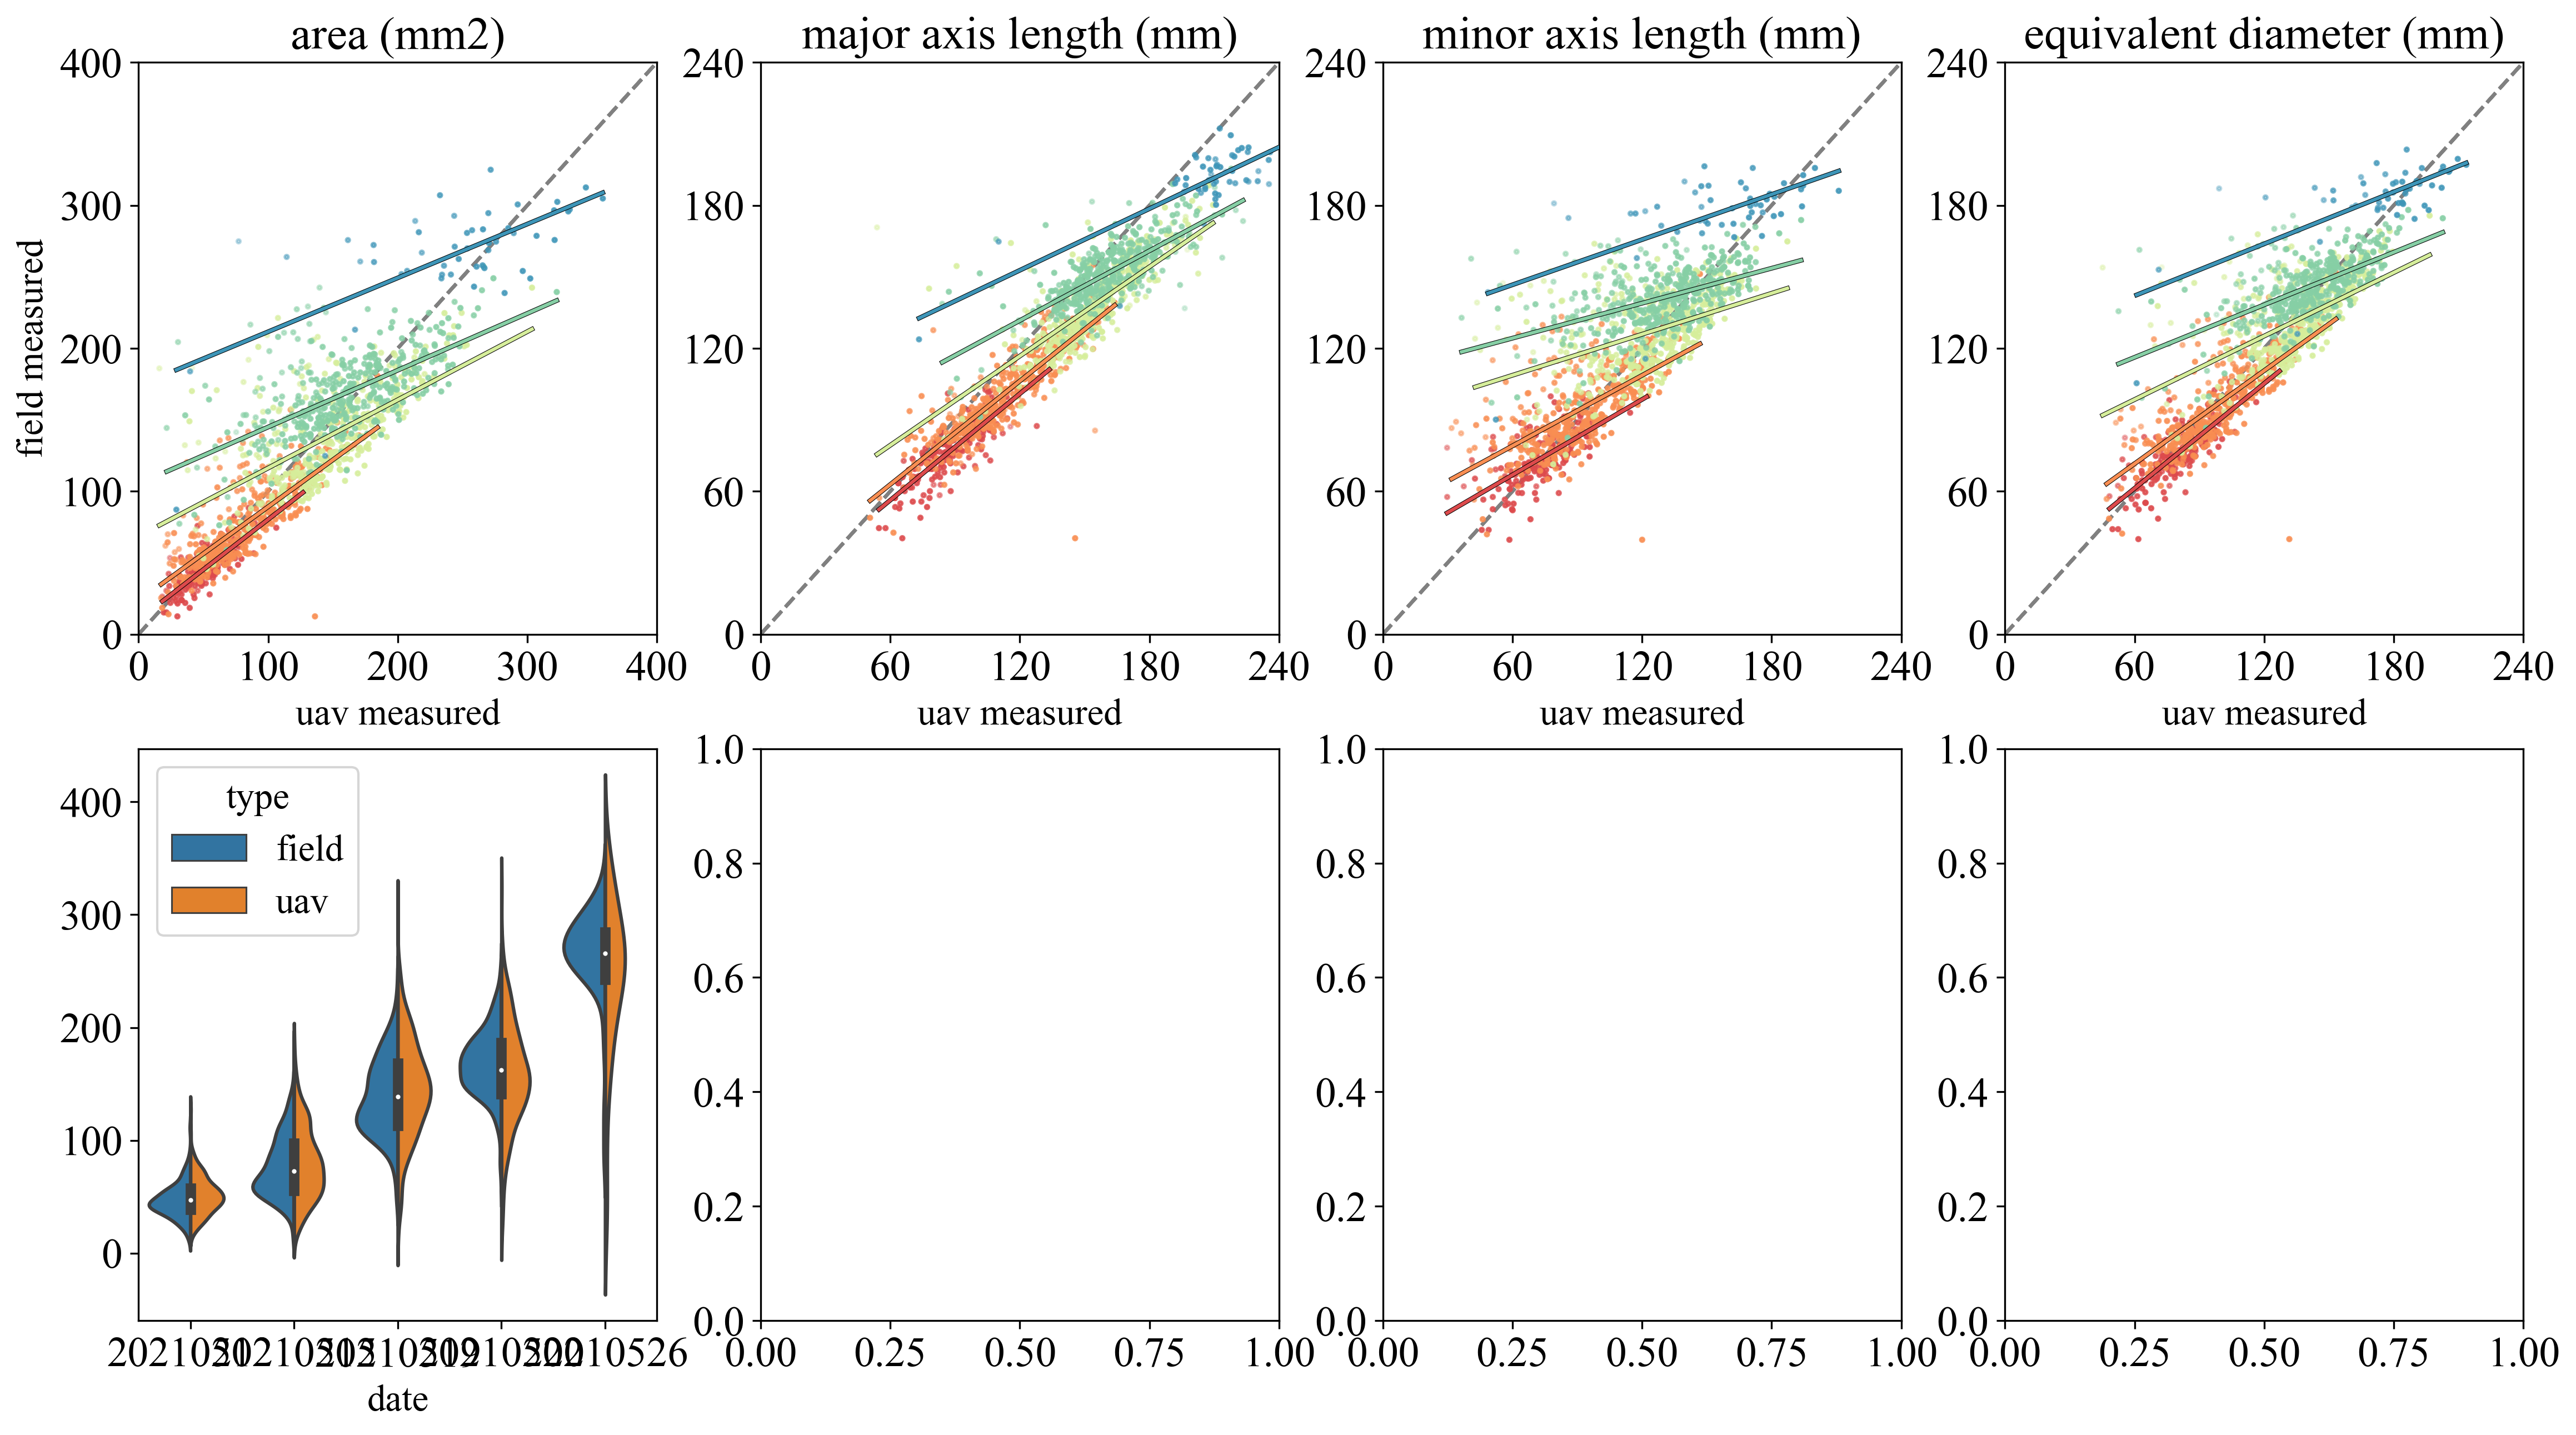

In [130]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18.46, 10), dpi=300)

violin_list = []
for i, d in enumerate(match_date):
    field = props_all[props_all.date == d]
    uav = merged_pd[merged_pd.date == d]
    
    merged = pd.merge(field, uav, on="field", suffixes=("_f","_u"))
    
    merged["area_f"] = merged["area_f"] / 100
    merged["area_u"] = merged["area_u"] / 100
    
    plot_column = ["area", "major_axis_length", "minor_axis_length", "equivalent_diameter"]
    violin_column = ["date", "area", "major_axis_length", "minor_axis_length", "equivalent_diameter"]
    lim_min = [0, 0, 0, 0]
    lim_max = [400, 240, 240, 240]
    unit = ["(mm2)", "(mm)", "(mm)", "(mm)"]
    
    # plot 1:1 table
    for j, pc in enumerate(plot_column):
        e_x = merged[f'{pc}_u']
        e_y = merged[f'{pc}_f']
        
        ax[0, j].plot([lim_min[j], lim_max[j]],[lim_min[j], lim_max[j]], '--', color="gray", zorder=-1)

        ax[0, j].scatter(y=e_y, x=e_x, color=palette[i], marker='o', s=3, alpha=merged.circularity_u)

        #reg_x, reg_y = lowess(e_x, e_y, 0.9)
        reg_x, reg_y, y_pred, t, r = linear(e_x, e_y)
        ax[0, j].plot(reg_x, reg_y, '-', color=palette[i], zorder=20, path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
        
        
        ax[0, j].set_xlim(lim_min[j], lim_max[j])
        ax[0, j].set_ylim(lim_min[j], lim_max[j])
        
        labels = np.linspace(lim_min[j], lim_max[j], 5).astype(np.int32)
        ax[0, j].set_xticks(labels)
        ax[0, j].set_yticks(labels)
        ax[0, j].set_xticklabels(labels)
        ax[0, j].set_yticklabels(labels)
        
        ax[0, j].set_xlabel("uav measured")
        
        ax[0, j].set_title(f"{pc.replace('_', ' ')} {unit[j]}")
    
    ax[0, 0].set_ylabel("field measured")

    # plot violine table
    fi = merged[[f"{l}_f" for l in violin_column]].copy()
    fi = fi.rename(columns={f"{l}_f":l for l in violin_column})
    fi = fi.astype({l: np.float64 for l in plot_column})
    fi["type"] = "field"

    uv = merged[[f"{l}_u" for l in violin_column]].copy()
    uv = uv.rename(columns={f"{l}_u":l for l in violin_column})
    uv = uv.astype({l: np.float64 for l in plot_column})
    uv["type"] = "uav"

    data_violin = pd.concat([fi, uv])
    violin_list.append(data_violin)
    
violin_data = pd.concat(violin_list)
    
for j, pc in enumerate(plot_column):
    result_dict = sns.violinplot(x="date", y=pc, hue="type", data=violin_data, split=True, ax=ax[1, j])
    
    ax[1, j].set_ylabel(None)
    
    break
    
plt.show()

In [132]:
dir(result_dict)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_clipon',
 '_clippath',
 '_colorbars',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',

In [177]:
result_dict.collections

In [137]:
type(result_dict.collections[0])

matplotlib.collections.PolyCollection

In [140]:
for items in result_dict.collections:
    if isinstance(items, PolyCollection):
        

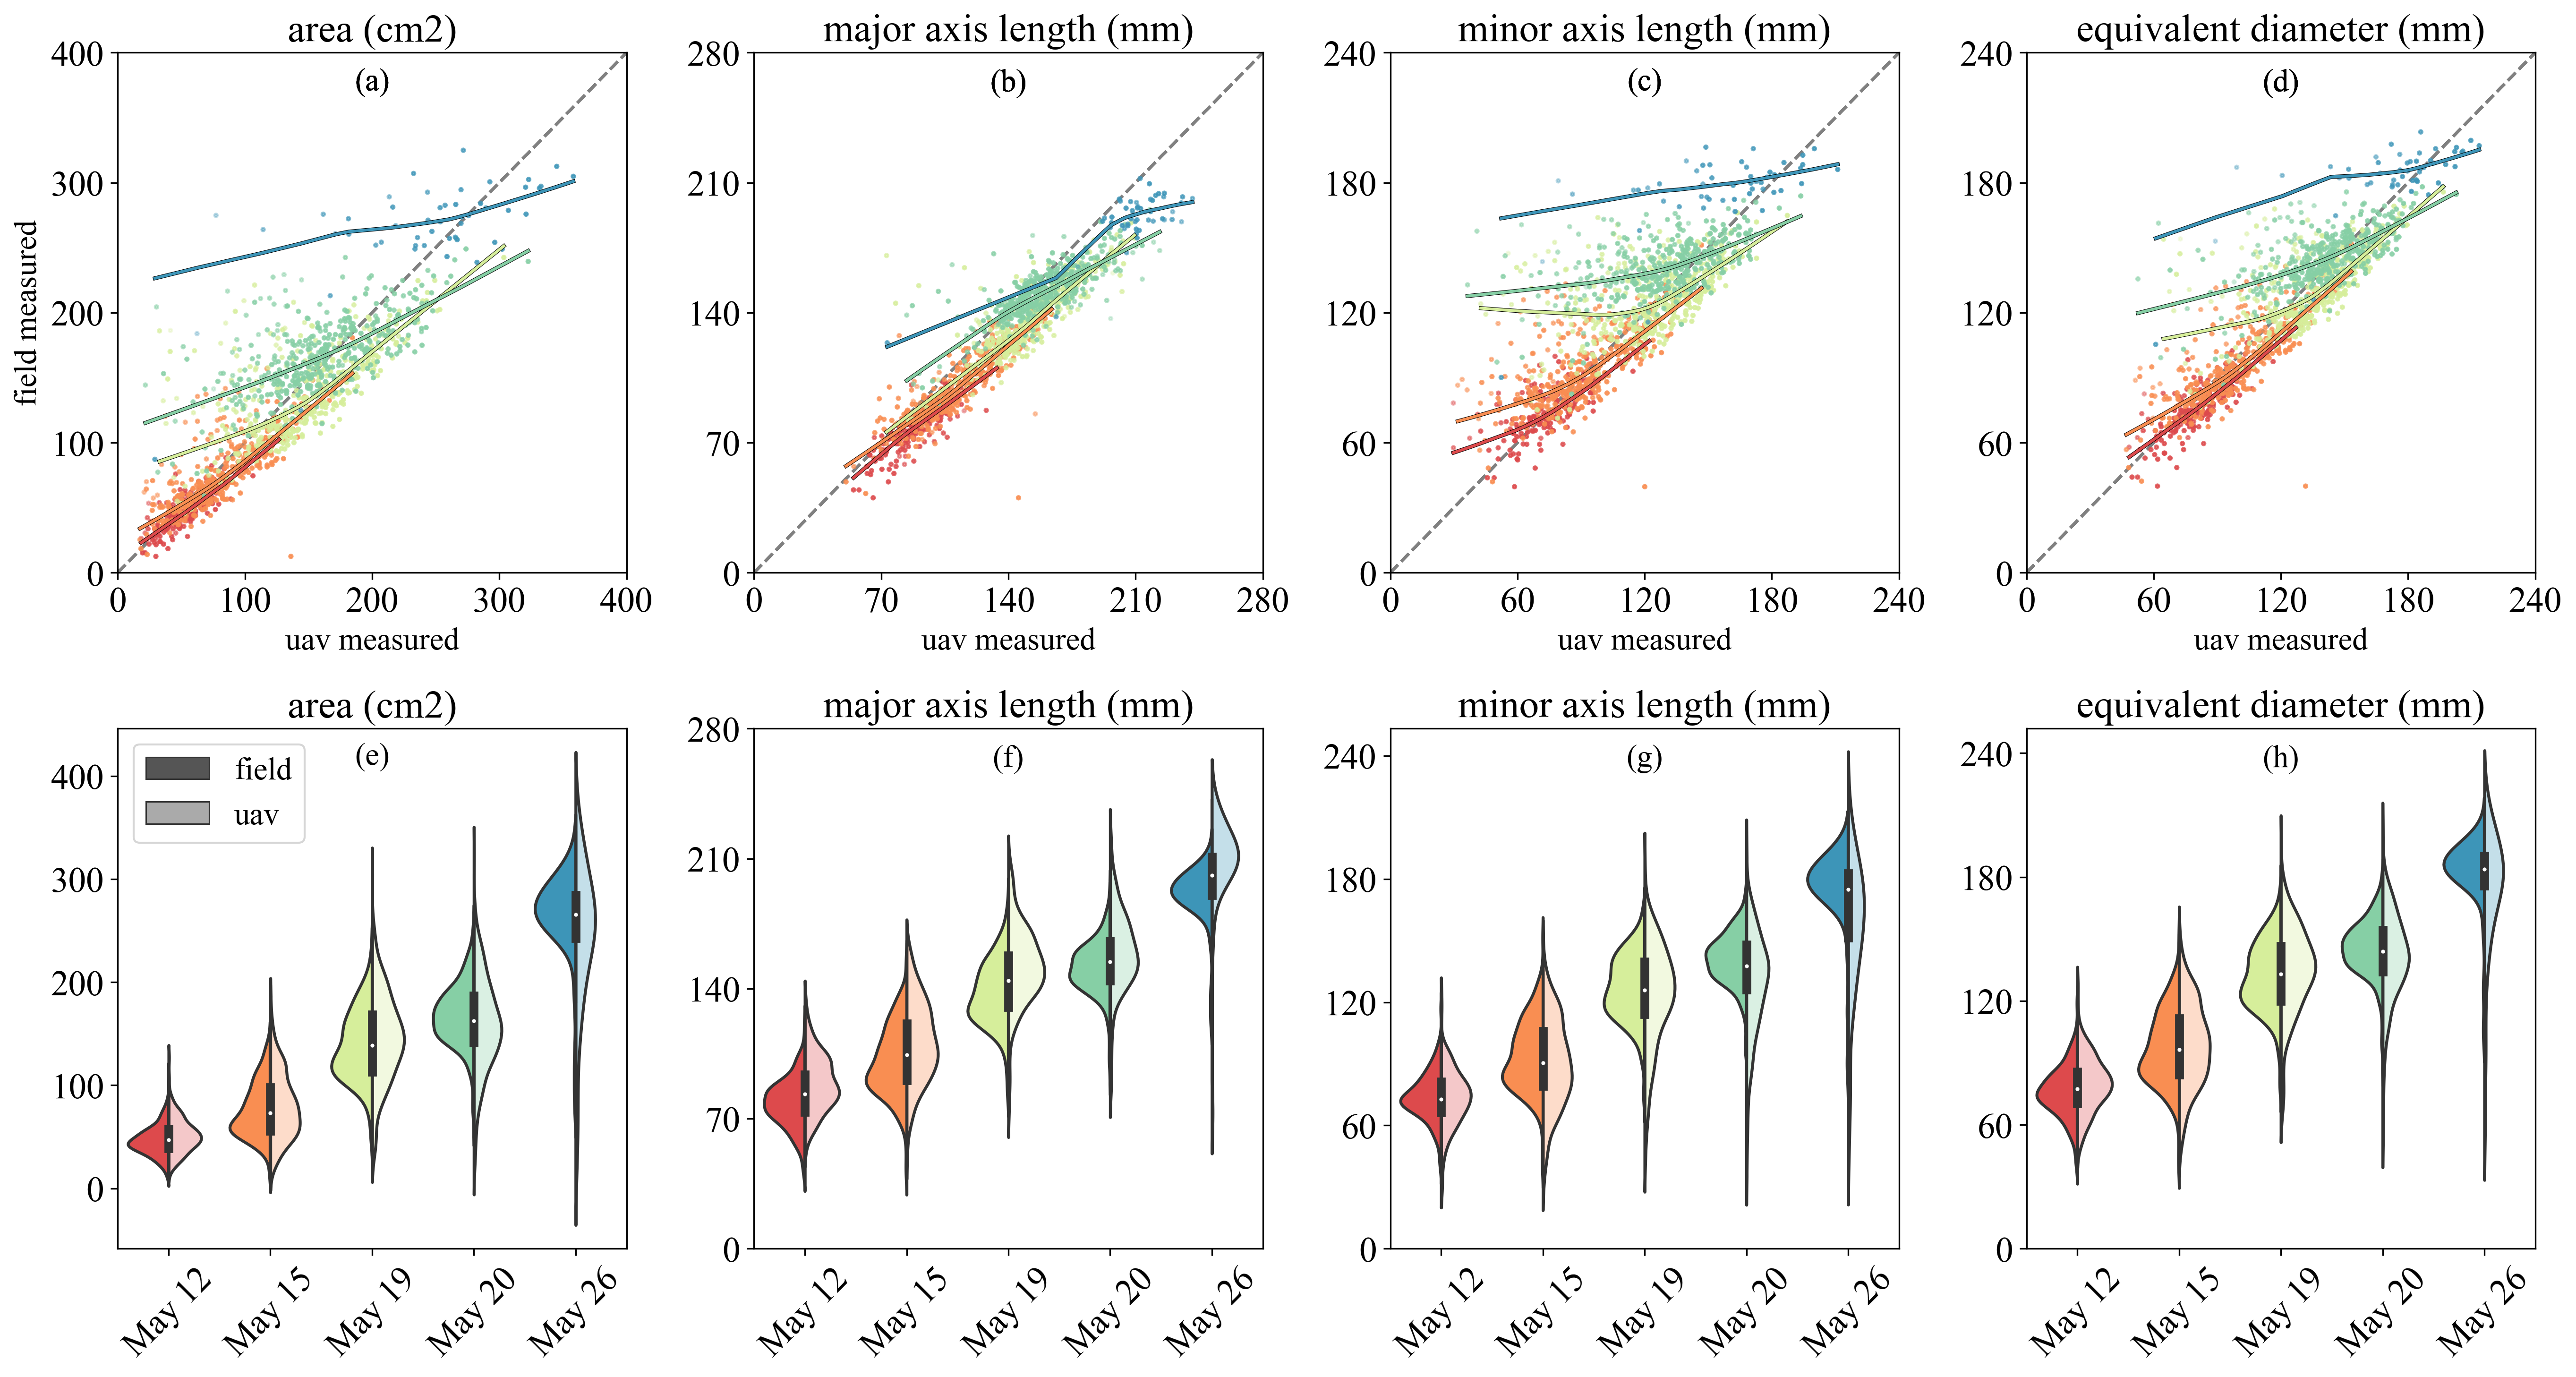

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18.46, 10), dpi=300)

violin_list = []
for i, d in enumerate(match_date):
    field = props_all[props_all.date == d]
    uav = merged_pd[merged_pd.date == d]
    
    merged = pd.merge(field, uav, on="field", suffixes=("_f","_u"))
    
    merged["area_f"] = merged["area_f"] / 100
    merged["area_u"] = merged["area_u"] / 100
    
    plot_column = ["area", "major_axis_length", "minor_axis_length", "equivalent_diameter"]
    violin_column = ["date", "area", "major_axis_length", "minor_axis_length", "equivalent_diameter"]
    lim_min = [0, 0, 0, 0]
    lim_max = [400, 280, 240, 240]
    unit = ["(cm2)", "(mm)", "(mm)", "(mm)"]
    
    plot_rank = ["(a)", "(b)", "(c)", "(d)"]
    violin_rank = ["(e)", "(f)", "(g)", "(h)"]
    
    # plot 1:1 table
    for j, pc in enumerate(plot_column):
        e_x = merged[f'{pc}_u']
        e_y = merged[f'{pc}_f']
        
        ax[0, j].plot([lim_min[j], lim_max[j]],[lim_min[j], lim_max[j]], '--', color="gray", zorder=-1)

        ax[0, j].scatter(y=e_y, x=e_x, color=palette[i], marker='o', s=3, alpha=merged.circularity_u)

        reg_x, reg_y = lowess(e_x, e_y, 0.9)
        #reg_x, reg_y, y_pred, t, r = linear(e_x, e_y)
        ax[0, j].plot(reg_x, reg_y, '-', color=palette[i], zorder=20, path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
        
        
        ax[0, j].set_xlim(lim_min[j], lim_max[j])
        ax[0, j].set_ylim(lim_min[j], lim_max[j])
        
        labels = np.linspace(lim_min[j], lim_max[j], 5).astype(np.int32)
        ax[0, j].set_xticks(labels)
        ax[0, j].set_yticks(labels)
        ax[0, j].set_xticklabels(labels)
        ax[0, j].set_yticklabels(labels)
        
        ax[0, j].set_xlabel("uav measured")
        
        ax[0, j].set_title(f"{pc.replace('_', ' ')} {unit[j]}")
        ax[0, j].text(labels[2], lim_max[j]*0.97, plot_rank[j], ha="center", va="top")
    
    ax[0, 0].set_ylabel("field measured")

    # plot violine table
    fi = merged[[f"{l}_f" for l in violin_column]].copy()
    fi = fi.rename(columns={f"{l}_f":l for l in violin_column})
    fi = fi.astype({l: np.float64 for l in plot_column})
    fi["type"] = "field"

    uv = merged[[f"{l}_u" for l in violin_column]].copy()
    uv = uv.rename(columns={f"{l}_u":l for l in violin_column})
    uv = uv.astype({l: np.float64 for l in plot_column})
    uv["type"] = "uav"

    data_violin = pd.concat([fi, uv])
    violin_list.append(data_violin)
    
violin_data = pd.concat(violin_list)
    
for j, pc in enumerate(plot_column):
    result_dict = sns.violinplot(x="date", y=pc, hue="type", data=violin_data, split=True, ax=ax[1, j], palette="gray")
    
    labels = np.linspace(lim_min[j], lim_max[j], 5).astype(np.int32)
    
    # CHANGE color
    collect = [item for item in result_dict.collections if isinstance(item, PolyCollection)]
    for k, it in enumerate(collect):
        if k % 2 == 0: 
            color = list(palette[k//2]) + [1]
        else:
            color = list(palette[k//2]) + [0.3]
   
        it.set_facecolor(color)
    
    ax[1, j].set_ylabel(None)
    ax[1, j].set_xlabel(None)
    if j != 0:
        ax[1, j].get_legend().remove()
    else:
        ax[1, j].get_legend().set_title(None)
    
    ax[1, j].set_xticklabels(["May 12", "May 15", "May 19","May 20", "May 26"], rotation=45)
    
    ax[1, j].set_yticks(labels)
    ax[1, j].set_yticklabels(labels)
    
    ax[1, j].set_title(f"{pc.replace('_', ' ')} {unit[j]}")
    
    xticks = ax[1, j].get_xticks()
    _, x_max = ax[1, j].get_ylim()
    ax[1, j].text(xticks[2], x_max*0.97, violin_rank[j], ha="center", va="top")

plt.tight_layout()
plt.savefig("2021_results.png")
plt.show()

In [174]:
 ax[1, j].get_ylim()

(-59.77709936269813, 447.1370993626981)